In [1]:
library(tidyverse)
library(ggplot2)
library(countrycode)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
agriculture_land <- read.csv("agricultural_land_percentage.csv")
co2_emissions <- read.csv("co2_emissions_per_capita.csv")
forest_area <- read.csv("forest_area_percentage.csv")
methane_emissions <- read.csv("methane_emissions.csv")
nitrous_oxide_emissions <- read.csv("nitrous_oxide_emissions.csv")
renewable_energy_output <- read.csv("renewable_energy_output.csv")
school_enrollment_primary <- read.csv("school_enrollment_primary.csv")
school_enrollment_secondary <- read.csv("school_enrollment_secondary.csv")
urban_population <- read.csv("urban_population_percentage.csv")

In [3]:
# label countries according to their continent
agriculture_land$continent <- countrycode(sourcevar = agriculture_land$Country.Name, origin = "country.name", destination = "continent")
co2_emissions$continent <- countrycode(sourcevar = co2_emissions$Country.Name, origin = "country.name", destination = "continent")
forest_area$continent <- countrycode(sourcevar = forest_area$Country.Name, origin = "country.name", destination = "continent")
methane_emissions$continent <- countrycode(sourcevar = methane_emissions$Country.Name, origin = "country.name", destination = "continent")
nitrous_oxide_emissions$continent <- countrycode(sourcevar = nitrous_oxide_emissions$Country.Name, origin = "country.name", destination = "continent")
renewable_energy_output$continent <- countrycode(sourcevar = renewable_energy_output$Country.Name, origin = "country.name", destination = "continent")
school_enrollment_primary$continent <- countrycode(sourcevar = school_enrollment_primary$Country.Name, origin = "country.name", destination = "continent")
school_enrollment_secondary$continent <- countrycode(sourcevar = school_enrollment_secondary$Country.Name, origin = "country.name", destination = "continent")
urban_population$continent <- countrycode(sourcevar = urban_population$Country.Name, origin = "country.name", destination = "continent")

Warning message:
"Some values were not matched unambiguously: Africa Eastern and Southern, Africa Western and Central, Arab World, Caribbean small states, Central Europe and the Baltics, Channel Islands, Early-demographic dividend, East Asia & Pacific, East Asia & Pacific (excluding high income), East Asia & Pacific (IDA & IBRD countries), Euro area, Europe & Central Asia, Europe & Central Asia (excluding high income), Europe & Central Asia (IDA & IBRD countries), European Union, Fragile and conflict affected situations, Heavily indebted poor countries (HIPC), High income, IBRD only, IDA & IBRD total, IDA blend, IDA only, IDA total, Kosovo, Late-demographic dividend, Latin America & Caribbean, Latin America & Caribbean (excluding high income), Latin America & the Caribbean (IDA & IBRD countries), Least developed countries: UN classification, Low & middle income, Low income, Lower middle income, Middle East & North Africa, Middle East & North Africa (excluding high income), Middle East 

In [4]:
# aggregate the data by continent
agriculture <- agriculture_land %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))
co2 <- co2_emissions %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))
forest <- forest_area %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))
methane <- methane_emissions %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))
nitrous_oxide <- nitrous_oxide_emissions %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))
renewable_energy <- renewable_energy_output %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))
school_primary <- school_enrollment_primary %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))
school_secondary <- school_enrollment_secondary %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))
urban <- urban_population %>%
  group_by(continent) %>%
  summarise(across(`X1961`:`X2022`, mean, na.rm = TRUE))

Warning message:
"There was 1 warning in `summarise()`.
ℹ In argument: `across(X1961:X2022, mean, na.rm = TRUE)`.
ℹ In group 1: `continent = "Africa"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))"


In [5]:
# remove the continent "NA" from the data
agriculture <- agriculture %>%
  filter(continent != "NA")
co2 <- co2 %>%
    filter(continent != "NA")
forest <- forest %>%
    filter(continent != "NA")
methane <- methane %>%
    filter(continent != "NA")
nitrous_oxide <- nitrous_oxide %>%
    filter(continent != "NA")
renewable_energy <- renewable_energy %>%
    filter(continent != "NA")
school_primary <- school_primary %>%
    filter(continent != "NA")
school_secondary <- school_secondary %>%
    filter(continent != "NA")
urban <- urban %>%
    filter(continent != "NA")

In [6]:
# sum all the emissions to get the total emissions for each year by continent
emissions <- data.frame(continent = methane$continent, X1961 = methane$X1961 + nitrous_oxide$X1961 + co2$X1961, X1962 = methane$X1962 + nitrous_oxide$X1962 + co2$X1962,
                        X1963 = methane$X1963 + nitrous_oxide$X1963 + co2$X1963, X1964 = methane$X1964 + nitrous_oxide$X1964 + co2$X1964, X1965 = methane$X1965 + nitrous_oxide$X1965 + co2$X1965,
                        X1966 = methane$X1966 + nitrous_oxide$X1966 + co2$X1966, X1967 = methane$X1967 + nitrous_oxide$X1967 + co2$X1967, X1968 = methane$X1968 + nitrous_oxide$X1968 + co2$X1968,
                        X1969 = methane$X1969 + nitrous_oxide$X1969 + co2$X1969, X1970 = methane$X1970 + nitrous_oxide$X1970 + co2$X1970, X1971 = methane$X1971 + nitrous_oxide$X1971 + co2$X1971,
                        X1972 = methane$X1972 + nitrous_oxide$X1972 + co2$X1972, X1973 = methane$X1973 + nitrous_oxide$X1973 + co2$X1973, X1974 = methane$X1974 + nitrous_oxide$X1974 + co2$X1974,
                        X1975 = methane$X1975 + nitrous_oxide$X1975 + co2$X1975, X1976 = methane$X1976 + nitrous_oxide$X1976 + co2$X1976, X1977 = methane$X1977 + nitrous_oxide$X1977 + co2$X1977,
                        X1978 = methane$X1978 + nitrous_oxide$X1978 + co2$X1978, X1979 = methane$X1979 + nitrous_oxide$X1979 + co2$X1979, X1980 = methane$X1980 + nitrous_oxide$X1980 + co2$X1980,
                        X1981 = methane$X1981 + nitrous_oxide$X1981 + co2$X1981, X1982 = methane$X1982 + nitrous_oxide$X1982 + co2$X1982, X1983 = methane$X1983 + nitrous_oxide$X1983 + co2$X1983,
                        X1984 = methane$X1984 + nitrous_oxide$X1984 + co2$X1984, X1985 = methane$X1985 + nitrous_oxide$X1985 + co2$X1985, X1986 = methane$X1986 + nitrous_oxide$X1986 + co2$X1986,
                        X1987 = methane$X1987 + nitrous_oxide$X1987 + co2$X1987, X1988 = methane$X1988 + nitrous_oxide$X1988 + co2$X1988, X1989 = methane$X1989 + nitrous_oxide$X1989 + co2$X1989,
                        X1990 = methane$X1990 + nitrous_oxide$X1990 + co2$X1990, X1991 = methane$X1991 + nitrous_oxide$X1991 + co2$X1991, X1992 = methane$X1992 + nitrous_oxide$X1992 + co2$X1992,
                        X1993 = methane$X1993 + nitrous_oxide$X1993 + co2$X1993, X1994 = methane$X1994 + nitrous_oxide$X1994 + co2$X1994, X1995 = methane$X1995 + nitrous_oxide$X1995 + co2$X1995,
                        X1996 = methane$X1996 + nitrous_oxide$X1996 + co2$X1996, X1997 = methane$X1997 + nitrous_oxide$X1997 + co2$X1997, X1998 = methane$X1998 + nitrous_oxide$X1998 + co2$X1998,
                        X1999 = methane$X1999 + nitrous_oxide$X1999 + co2$X1999, X2000 = methane$X2000 + nitrous_oxide$X2000 + co2$X2000, X2001 = methane$X2001 + nitrous_oxide$X2001 + co2$X2001,
                        X2002 = methane$X2002 + nitrous_oxide$X2002 + co2$X2002, X2003 = methane$X2003 + nitrous_oxide$X2003 + co2$X2003, X2004 = methane$X2004 + nitrous_oxide$X2004 + co2$X2004,
                        X2005 = methane$X2005 + nitrous_oxide$X2005 + co2$X2005, X2006 = methane$X2006 + nitrous_oxide$X2006 + co2$X2006, X2007 = methane$X2007 + nitrous_oxide$X2007 + co2$X2007,
                        X2008 = methane$X2008 + nitrous_oxide$X2008 + co2$X2008, X2009 = methane$X2009 + nitrous_oxide$X2009 + co2$X2009, X2010 = methane$X2010 + nitrous_oxide$X2010 + co2$X2010,
                        X2011 = methane$X2011 + nitrous_oxide$X2011 + co2$X2011, X2012 = methane$X2012 + nitrous_oxide$X2012 + co2$X2012, X2013 = methane$X2013 + nitrous_oxide$X2013 + co2$X2013,
                        X2014 = methane$X2014 + nitrous_oxide$X2014 + co2$X2014, X2015 = methane$X2015 + nitrous_oxide$X2015 + co2$X2015, X2016 = methane$X2016 + nitrous_oxide$X2016 + co2$X2016,
                        X2017 = methane$X2017 + nitrous_oxide$X2017 + co2$X2017, X2018 = methane$X2018 + nitrous_oxide$X2018 + co2$X2018, X2019 = methane$X2019 + nitrous_oxide$X2019 + co2$X2019,
                        X2020 = methane$X2020 + nitrous_oxide$X2020 + co2$X2020, X2021 = methane$X2021 + nitrous_oxide$X2021 + co2$X2021, X2022 = methane$X2022 + nitrous_oxide$X2022 + co2$X2022)

In [7]:
# remove data till 1989 as the data is not available for all continents
emissions <- emissions %>%
  select(-c(X1961:X1989))


emissions

continent,X1990,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,⋯,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X2021,X2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,18480.37,19069.26,19339.72,19690.99,21292.29,21660.30,22176.21,22339.91,22944.56,⋯,28409.00,28413.50,28765.78,29345.35,29872.49,30325.36,30854.97,30846.73,NaN,NaN
Americas,62461.55,63312.66,64045.00,64436.75,65768.70,66771.58,67264.55,67710.51,67658.51,⋯,75582.51,77001.14,77042.89,76637.14,76919.99,77242.09,78244.50,76624.50,NaN,NaN
Asia,72417.00,73220.15,73623.23,74623.01,75514.37,78193.59,79822.34,78969.20,79775.46,⋯,103970.12,105119.62,105894.96,106445.54,107862.36,109522.73,110128.45,110290.07,NaN,NaN
Europe,49675.00,47968.43,45556.82,44115.63,43010.77,42000.58,41644.19,40523.36,39378.34,⋯,35606.88,35471.86,35584.71,35915.74,36263.97,36547.34,36583.20,36304.21,NaN,NaN
Oceania,19647.18,19632.44,19486.33,19436.99,19652.24,19743.22,18930.47,18953.97,19445.86,⋯,19001.73,20901.58,20441.57,18192.14,21402.80,21146.90,19163.37,17338.95,NaN,NaN


Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_line()`)."


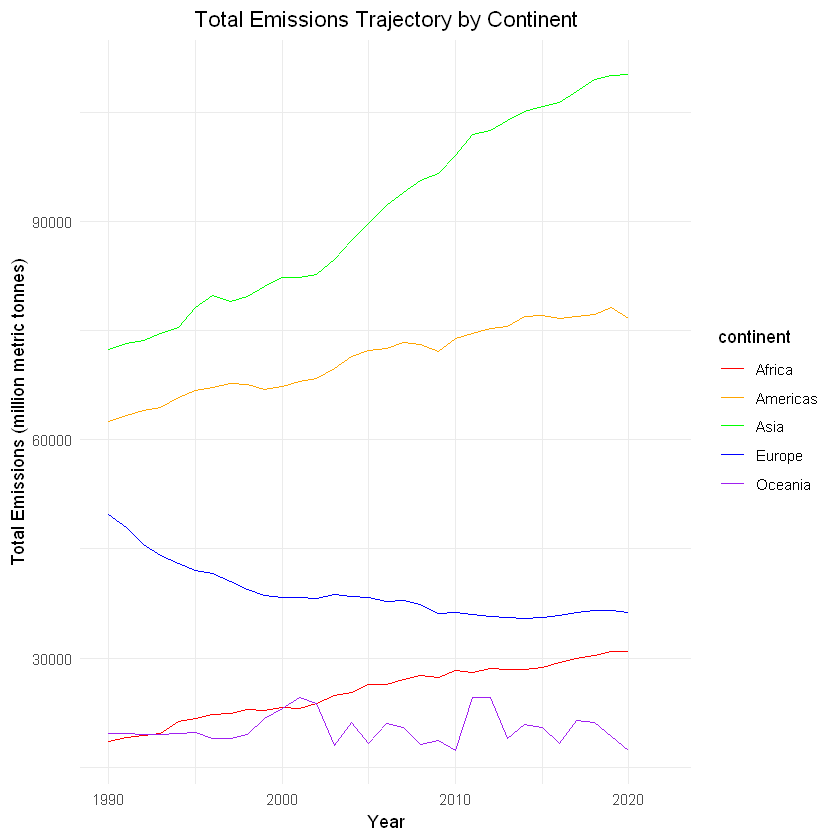

In [17]:
# make a line plot with each of the continent's trajectory over the years for total emissions

# Convert from wide to long format
emissions_long <- emissions %>%
  pivot_longer(cols = starts_with("X"), names_to = "Year", values_to = "TotalEmissions") %>%
  mutate(Year = as.numeric(str_replace(Year, "X", "")))  # Convert year to numeric

# Plot
ggplot(emissions_long, aes(x = Year, y = TotalEmissions, color = continent, group = continent)) +
  geom_line() + # Thicker lines
  theme_minimal() + # A minimal theme without grey background
  labs(title = "Total Emissions Trajectory by Continent",
       x = "Year",
       y = "Total Emissions (million metric tonnes)") +
  theme(plot.title = element_text(hjust = 0.5)) + # Center the plot title
  theme(plot.background = element_blank()) + # Remove any background color
  # set the color palette
  scale_color_manual(values = c("Africa" = "red", "Asia" = "green", "Europe" = "blue", "Americas" = "orange", "Oceania" = "purple"))

In [9]:
# remove data till 1970 as the data is not available for all continents
school_secondary <- school_secondary %>%
  select(-c(X1961:X1970))

school_secondary

continent,X1971,X1972,X1973,X1974,X1975,X1976,X1977,X1978,X1979,⋯,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X2021,X2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,0.4780686,0.5019503,0.5035958,0.5039366,0.5654854,0.5564064,0.5719525,0.5760725,0.5832567,⋯,0.8990392,0.9065811,0.9000717,0.9269842,0.9551420,0.9719944,0.9898236,1.003266,1.0084755,NaN
Americas,1.0002579,1.0092614,1.0825524,1.0565148,1.1564008,1.1935638,1.0651109,1.0394310,1.0885762,⋯,1.0522210,1.0414557,1.0436461,1.0317822,1.0325912,1.0239896,1.0244732,1.034216,1.0340923,NaN
Asia,0.5890773,0.6165404,0.6719540,0.7186625,0.7299805,0.7394689,0.6902748,0.7350461,0.7700827,⋯,0.9813203,0.9961983,0.9947821,0.9875052,0.9981941,1.0050728,1.0070684,1.014522,1.0274975,1.023031
Europe,0.9481513,0.9665441,0.9656541,0.9890464,0.9753425,1.0250236,1.0106005,0.9900023,1.0019159,⋯,1.0037415,0.9998222,1.0010289,0.9987930,0.9952851,0.9985587,0.9984403,1.003100,0.9862757,NaN
Oceania,0.8229150,0.8722943,0.9029443,0.8173043,0.7909537,0.8742717,0.8582471,0.9583880,0.9978967,⋯,1.0625500,1.0809774,1.0551167,1.0515480,0.9757850,1.0021898,1.0110837,1.066162,1.0771486,NaN


Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`)."


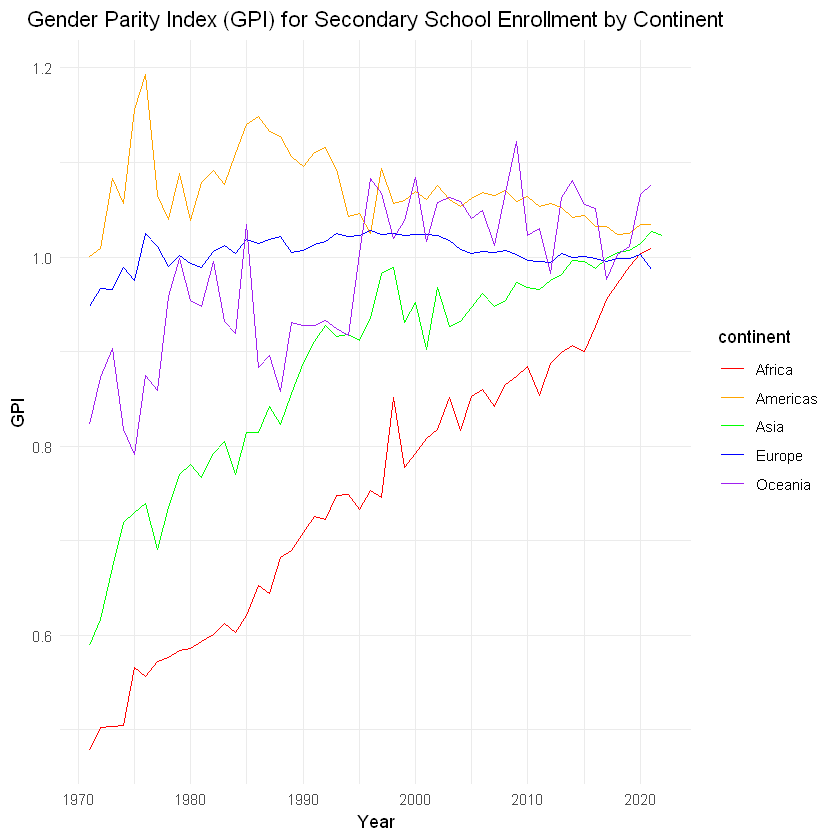

In [10]:
# Convert from wide to long format
secondary_long <- school_secondary %>%
  pivot_longer(cols = starts_with("X"), names_to = "Year", values_to = "AvgGPI") %>%
  mutate(Year = as.numeric(str_replace(Year, "X", "")))  # Convert year to numeric

# Plot
ggplot(secondary_long, aes(x = Year, y = AvgGPI, color = continent, group = continent)) +
  geom_line() + # Thicker lines
  theme_minimal() + # A minimal theme without grey background
  labs(title = "Gender Parity Index (GPI) for Secondary School Enrollment by Continent",
       x = "Year",
       y = "GPI") +
  theme(plot.title = element_text(hjust = 0.5)) + # Center the plot title
  theme(plot.background = element_blank()) + # Remove any background color
  # set the color palette
  scale_color_manual(values = c("Africa" = "red", "Asia" = "green", "Europe" = "blue", "Americas" = "orange", "Oceania" = "purple"))

In [11]:
urban

continent,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,⋯,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X2021,X2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,16.58643,17.06804,17.57713,18.12230,18.72719,19.33596,19.93096,20.54517,21.17707,⋯,43.60070,44.04604,44.49474,44.94663,45.40198,45.86102,46.32341,46.78939,47.25852,47.73100
Americas,48.30164,48.78736,49.27731,49.77978,50.25507,50.72816,51.19418,51.66000,52.12311,⋯,67.60909,67.81580,68.02449,68.23524,68.44858,68.66522,68.88524,69.10871,69.33567,69.56622
Asia,37.64388,38.18710,38.72152,39.24668,39.76432,40.29252,40.85844,41.45242,42.05250,⋯,59.33922,59.63224,59.94876,60.26802,60.58904,60.91362,61.24160,61.57294,61.90766,62.24596
Europe,53.05841,53.71530,54.38128,55.04811,55.71328,56.36826,57.01293,57.65183,58.27765,⋯,70.73013,70.90848,71.08843,71.27213,71.46041,71.65476,71.85513,72.06154,72.27400,72.49248
Oceania,39.41432,40.00789,40.62174,41.25011,41.88126,42.51584,43.14832,43.91737,44.68747,⋯,58.53874,58.77653,59.01347,59.24789,59.48011,59.71263,59.94579,60.18000,60.41495,60.65089


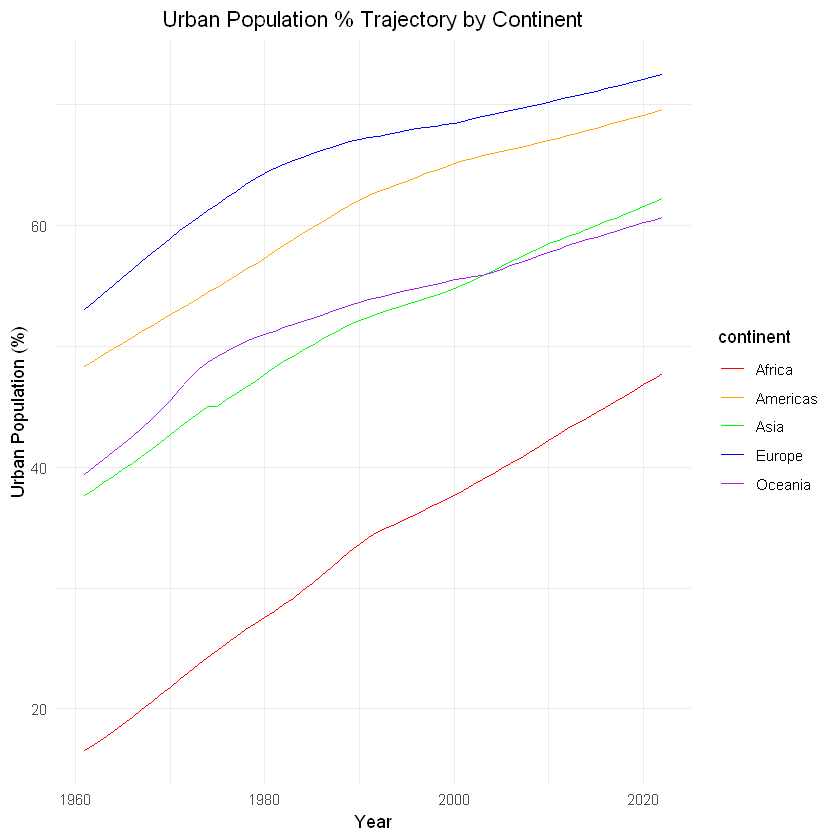

In [12]:
# Convert from wide to long format
urban_long <- urban %>%
  pivot_longer(cols = starts_with("X"), names_to = "Year", values_to = "UrbanPopulation") %>%
  mutate(Year = as.numeric(str_replace(Year, "X", "")))  # Convert year to numeric

# Plot
ggplot(urban_long, aes(x = Year, y = UrbanPopulation, color = continent, group = continent)) +
  geom_line() + # Thicker lines
  theme_minimal() + # A minimal theme without grey background
  labs(title = "Urban Population % Trajectory by Continent",
       x = "Year",
       y = "Urban Population (%)") +
  theme(plot.title = element_text(hjust = 0.5)) + # Center the plot title
  theme(plot.background = element_blank()) + # Remove any background color
  # set the color palette
  scale_color_manual(values = c("Africa" = "red", "Asia" = "green", "Europe" = "blue", "Americas" = "orange", "Oceania" = "purple"))

In [13]:
# remove data till 1990 as the data is not available for all continents
forest <- forest %>%
  select(-c(X1961:X1989))

forest

continent,X1990,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,⋯,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X2021,X2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,32.38533,32.23920,32.09307,31.57066,31.42663,31.28259,31.13856,30.99453,30.85050,⋯,28.36530,28.23407,28.10274,27.96182,27.82548,27.68418,27.54027,27.39741,27.25383,NaN
Americas,43.62543,43.53013,43.43482,43.33951,43.24420,43.14889,43.05358,42.95827,42.99696,⋯,39.87009,39.82623,39.77689,39.73445,39.66822,39.61729,39.56697,39.51084,39.46505,NaN
Asia,26.60482,26.56557,23.93543,23.90640,24.07487,24.04661,24.01875,23.99049,23.96260,⋯,23.76979,23.72694,23.69322,23.64941,23.60507,23.57334,23.54066,23.50900,23.47051,NaN
Europe,24.14568,24.22504,28.13632,28.62604,28.70369,28.78139,28.85773,28.93546,29.01367,⋯,30.72941,30.78765,30.85060,30.89530,30.95806,30.98135,31.00217,31.05083,31.07054,NaN
Oceania,42.74790,49.50198,49.51611,49.53023,49.54436,49.55848,49.57261,49.58674,49.60086,⋯,49.73285,49.74717,49.76150,49.48157,49.54509,49.55512,49.56530,49.57883,49.59013,NaN


Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`)."


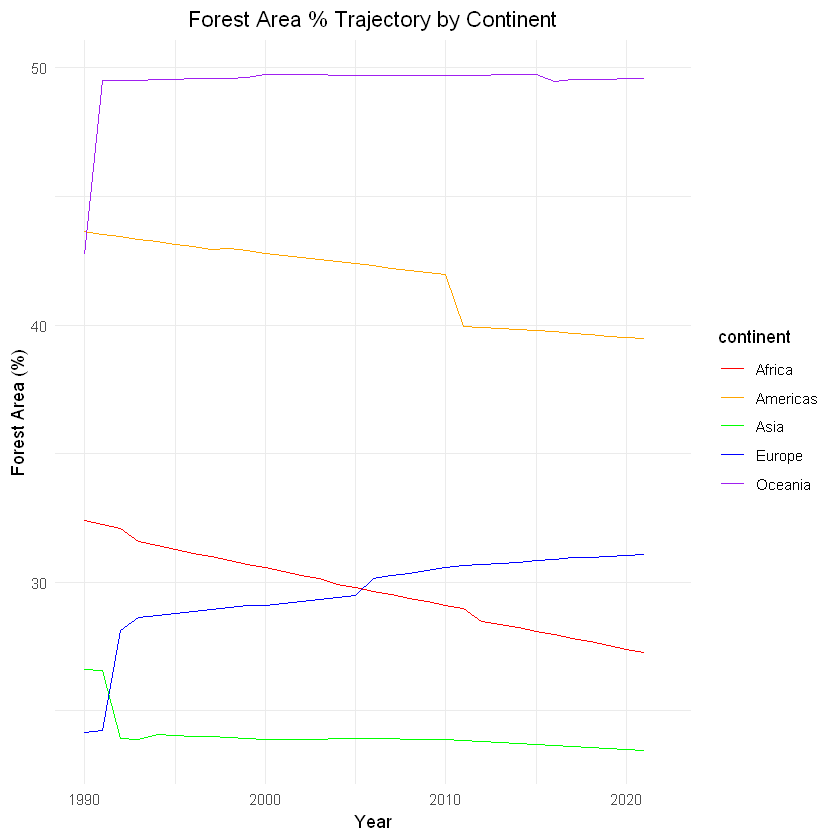

In [14]:
# Convert from wide to long format
forest_long <- forest %>%
  pivot_longer(cols = starts_with("X"), names_to = "Year", values_to = "forestarea") %>%
  mutate(Year = as.numeric(str_replace(Year, "X", "")))  # Convert year to numeric

# Plot
ggplot(forest_long, aes(x = Year, y = forestarea, color = continent, group = continent)) +
  geom_line() + # Thicker lines
  theme_minimal() + # A minimal theme without grey background
  labs(title = "Forest Area % Trajectory by Continent",
       x = "Year",
       y = "Forest Area (%)") +
  theme(plot.title = element_text(hjust = 0.5)) + # Center the plot title
  theme(plot.background = element_blank()) + # Remove any background color
  # set the color palette
  scale_color_manual(values = c("Africa" = "red", "Asia" = "green", "Europe" = "blue", "Americas" = "orange", "Oceania" = "purple"))

In [15]:
agriculture

continent,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,⋯,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X2021,X2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,38.80053,38.89293,38.97669,39.08485,39.22862,39.27678,39.41768,39.54498,39.74456,⋯,45.41378,45.54053,45.67154,45.88463,46.00282,46.12312,46.13748,46.28042,46.38405,NaN
Americas,29.68708,29.67771,30.00914,30.33903,30.35989,30.70443,30.67764,30.69883,30.62013,⋯,28.43596,28.18820,28.23116,28.06430,27.97058,27.87398,27.72070,27.75624,27.76764,NaN
Asia,29.58123,29.64371,29.85307,29.95945,30.04426,30.03454,30.15233,30.16425,30.16376,⋯,35.98005,36.06529,36.26895,36.30732,36.45426,36.48295,36.48204,36.46487,36.38939,NaN
Europe,52.13589,51.97500,51.72462,51.50876,51.24660,51.23106,51.22314,51.15262,51.13957,⋯,42.33083,41.97716,42.52484,42.52964,42.47863,42.41838,42.58478,42.28402,42.13001,NaN
Oceania,25.90393,26.06137,26.64510,26.68209,27.27290,27.36692,26.97688,27.20801,27.34042,⋯,23.59851,23.82355,23.70077,23.52222,23.65797,23.20178,23.09242,23.02962,23.09737,NaN


Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`)."


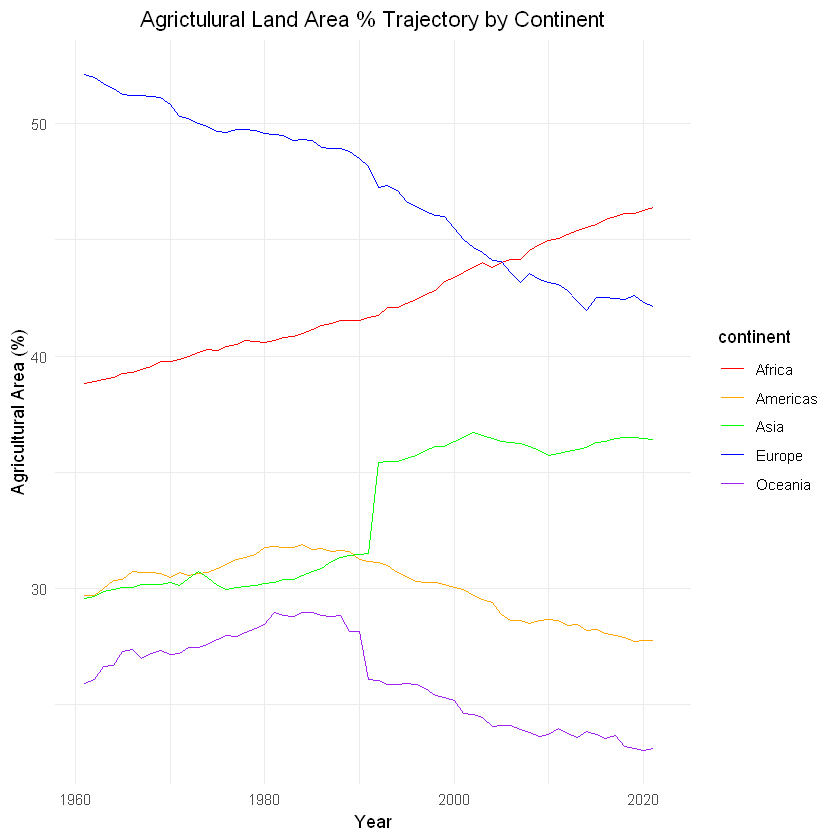

In [16]:
# Convert from wide to long format
agriculture_long <- agriculture %>%
  pivot_longer(cols = starts_with("X"), names_to = "Year", values_to = "agriculturearea") %>%
  mutate(Year = as.numeric(str_replace(Year, "X", "")))  # Convert year to numeric

# Plot
ggplot(agriculture_long, aes(x = Year, y = agriculturearea, color = continent, group = continent)) +
  geom_line() + # Thicker lines
  theme_minimal() + # A minimal theme without grey background
  labs(title = "Agrictulural Land Area % Trajectory by Continent",
       x = "Year",
       y = "Agricultural Area (%)") +
  theme(plot.title = element_text(hjust = 0.5)) + # Center the plot title
  theme(plot.background = element_blank()) + # Remove any background color
  # set the color palette
  scale_color_manual(values = c("Africa" = "red", "Asia" = "green", "Europe" = "blue", "Americas" = "orange", "Oceania" = "purple"))